# ✅ Binning 실습

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import KBinsDiscretizer

In [2]:
ages = np.array([22, 25, 35, 45, 52, 58, 67, 72]).reshape(-1, 1)
ages

array([[22],
       [25],
       [35],
       [45],
       [52],
       [58],
       [67],
       [72]])

In [7]:
# Equal Width Binning (같은 너비로 구간 나누기)
kbd_width = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='uniform') # 3개로 bin을 나누기
age_binned_width = kbd_width.fit_transform(ages)
age_binned_width

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [8]:
# Equal Frequency Binning (같은 개수가 들어가도록 구간 나누기)
kbd_freq = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
age_binned_freq = kbd_freq.fit_transform(ages)
age_binned_freq

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/preprocessing/_discretization.py:296: FutureWarning: The current default behavior, quantile_method='linear', will be changed to quantile_method='averaged_inverted_cdf' in scikit-learn version 1.9 to naturally support sample weight equivalence properties by default. Pass quantile_method='averaged_inverted_cdf' explicitly to silence this warning.
  warnings.warn(


array([[0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [2.],
       [2.],
       [2.]])

In [10]:
# Custom Binning with pandas (도메인 지식으로 직접 구간 설정)
df = pd.DataFrame({'age': ages.ravel()})
df['age_group'] = pd.cut(df['age'], bins=[0, 30, 60, 100], labels=['청년', '중년', '노년'])
df

,age,age_group
0,22,청년
1,25,청년
2,35,중년
3,45,중년
4,52,중년
5,58,중년
6,67,노년
7,72,노년


# ✅ Polynomial Features 실습

In [11]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
y = np.array([2, 7, 16, 29, 46])

In [12]:
model_linear = LinearRegression()
model_linear.fit(X, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
model_linear.predict(np.array([1, 2, 3, 4, 5]).reshape(-1, 1))

array([-2.,  9., 20., 31., 42.])

In [21]:
poly = PolynomialFeatures(2) # 2차항
X_poly = poly.fit_transform(X)
X_poly  #정확도 향상을 위해 [1, X, X제곱] 을 넣음

array([[ 1.,  1.,  1.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.]])

In [18]:
model_poly = LinearRegression()
model_poly.fit(X_poly, y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [20]:
model_poly.predict(X_poly)

array([ 2.,  7., 16., 29., 46.])

In [22]:
from sklearn.pipeline import make_pipeline

In [28]:
pipe = make_pipeline(PolynomialFeatures(), LinearRegression())

In [29]:
pipe.fit(X, y)

,steps,"[('polynomialfeatures', ...), ('linearregression', ...)]"
,transform_input,None
,memory,None
,verbose,False
,degree,2
,interaction_only,False
,include_bias,True
,order,'C'
,fit_intercept,True
,copy_X,True
,tol,1e-06


In [30]:
pipe.predict(X)

array([ 2.,  7., 16., 29., 46.])

# ✅ Filter Method 실습

In [39]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, VarianceThreshold

In [32]:
iris = load_iris()
X, y = iris.data, iris.target

In [36]:
# F-statistic (ANOVA)
selector_f = SelectKBest(score_func=f_classif, k=2) # f-static 그룹간 평균 차이 검정을 통해 2개의 best feature가져옴
X_f = selector_f.fit_transform(X, y)
X_f.shape

(150, 2)

In [38]:
# Mutual Information
selector_mi = SelectKBest(score_func=mutual_info_classif, k=2) # Mutual Information 사용해서 2개의 best feature가져옴
x_mi = selector_mi.fit_transform(X, y)
x_mi.shape

(150, 2)

In [41]:
# Variance Threshold
selector_var = VarianceThreshold(threshold=0.2) # 분산 값이 0.2보다 높은 컬럼 가져오기
x_var = selector_var.fit_transform(X, y)
x_var.shape

(150, 3)

# ✅ Wrapper Method 실습

In [86]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import cross_val_score

In [87]:
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
X.shape

(569, 30)

In [91]:
# RFE (Recursive Feature Elimination)
model = LinearRegression()
rfe = RFE(estimator=model, n_features_to_select=10) # 30개의 feature 중에서 10개를 가져옴
X_rfe = rfe.fit_transform(X, y)

print("전체 피처 수:", X.shape[1])
print("선택된 피처 수:", X_rfe.shape[1])
print("피처 순위:", rfe.ranking_)
print("선택된 피처:", [cancer.feature_names[i] 
                     for i in range(len(rfe.support_)) 
                     if rfe.support_[i]])

전체 피처 수: 30
선택된 피처 수: 10
피처 순위: [12 19 13 21  1  2  7  1  5  1  6 16  9 18  1  1  1  1  8 11 10 15 17 20
  1 14  3  4  1  1]
선택된 피처: [np.str_('mean smoothness'), np.str_('mean concave points'), np.str_('mean fractal dimension'), np.str_('smoothness error'), np.str_('compactness error'), np.str_('concavity error'), np.str_('concave points error'), np.str_('worst smoothness'), np.str_('worst symmetry'), np.str_('worst fractal dimension')]


In [60]:
rfe.ranking_

array([12, 19, 13, 21,  1,  2,  7,  1,  5,  1,  6, 16,  9, 18,  1,  1,  1,
        1,  8, 11, 10, 15, 17, 20,  1, 14,  3,  4,  1,  1])

In [62]:
score_all = cross_val_score(model, X, y, cv=5).mean()
score_rfe = cross_val_score(model, X_rfe, y, cv=5).mean()

score_all, score_rfe

(np.float64(0.704686173464433), np.float64(0.6621838122994806))

# ✅ Embedded Method 실습

In [75]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [64]:
# 데이터 로드
X, y = load_breast_cancer(return_X_y=True)

In [66]:
# 1. Lasso
lasso = Lasso(alpha=0.01)
lasso.fit(X, y)
lasso_coef = np.abs(lasso.coef_)
print("Lasso - 0인 계수:", np.sum(lasso_coef == 0)) # lasso로 가중치가 0이된 게수가 30개 중 22개임

Lasso - 0인 계수: 22


In [67]:
rf = DecisionTreeClassifier(max_depth=5, random_state=42)
rf.fit(X, y)
importances = rf.feature_importances_
importances

array([0.        , 0.01151705, 0.        , 0.        , 0.00716616,
       0.        , 0.        , 0.0089577 , 0.        , 0.        ,
       0.0059554 , 0.        , 0.        , 0.00956035, 0.00102519,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.71039073, 0.07127476, 0.00575852, 0.01132173, 0.01330367,
       0.        , 0.00187487, 0.14189385, 0.        , 0.        ])

In [80]:
# 상위 10개 중요 feature 추출
indices = np.argsort(importances)[::-1][:10] # 내림차순, 상위 10개 feature의 인덱스 추출

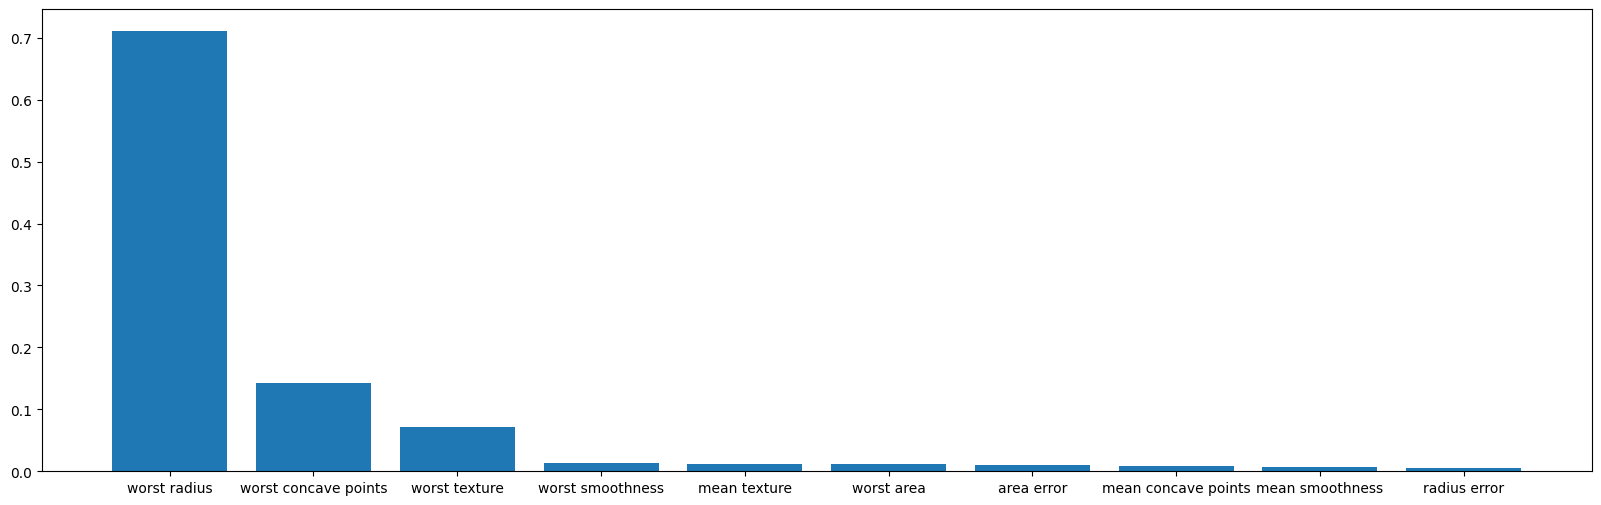

In [79]:
plt.figure(figsize=(20,6))
plt.bar(range(10), importances[indices])
plt.xticks(range(10), [cancer.feature_names[i] for i in indices])
plt.show()

# Z-Score 실습

[107.4507123   97.92603548 109.71532807 122.84544785  96.48769938
  96.48794565 123.68819223 111.51152094  92.95788421 108.13840065
  93.04873461  93.0140537  103.62943407  71.30079633  74.12623251
  91.56568706  84.80753319 104.71370999  86.37963887  78.81544448
 121.98473153  96.61335549 101.01292307  78.62877721  91.83425913
 101.66383885  82.73509634 105.63547028  90.99041965  95.62459375
  90.97440082 127.78417277  99.79754163  84.13433607 112.33817368
  81.68734525 103.13295393  70.60494814  80.07720927 102.95291854
 111.0769987  102.57052422  98.26527576  95.48344457  77.82217014
  89.20233687  93.09041844 115.85683339 105.15427434  73.55439767
 104.86125954  94.22376579  89.84617    109.17514433 115.46499284
 113.96920179  87.41173715  95.36181436 104.96895147 114.63317691
  92.81238643  97.21511535  83.40497539  82.05690064 112.18788734
 120.34360043  98.91984818 115.05299347 105.42454038  90.32320368
 105.42093408 123.0705485   99.46260941 123.46965484  60.70382344
 112.32853

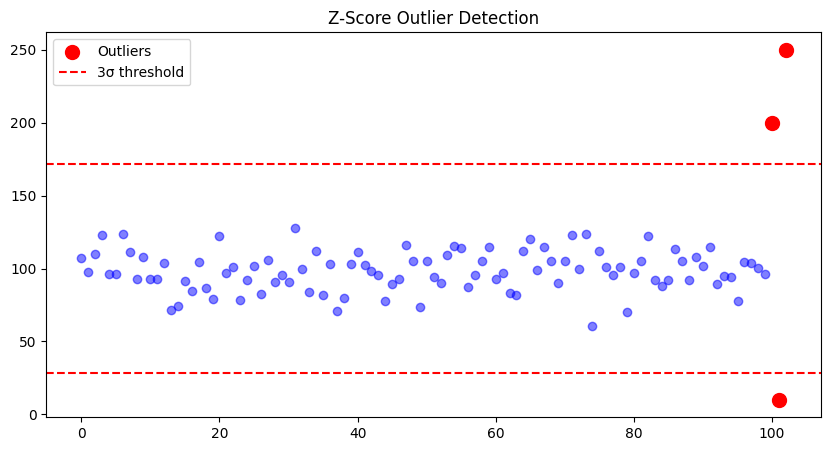

In [93]:
from scipy import stats

# 데이터 생성 (정규분포 + 이상치)
np.random.seed(42)
data = np.random.normal(100, 15, 100)  # 평균 100, 표준편차 15
data = np.append(data, [200, 10, 250])  # 이상치 추가
print(data)

# Z-Score 계산
z_scores = np.abs(stats.zscore(data))
threshold = 3
print(z_scores)

# 이상치 탐지
outliers = np.where(z_scores > threshold)
print("이상치 인덱스:", outliers[0])
print("이상치 값:", data[outliers])
print("이상치 Z-Score:", z_scores[outliers])

# 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.scatter(range(len(data)), data, c='blue', alpha=0.5)
plt.scatter(outliers, data[outliers], c='red', s=100, label='Outliers')
plt.axhline(y=np.mean(data) + 3*np.std(data), color='r', 
            linestyle='--', label='3σ threshold')
plt.axhline(y=np.mean(data) - 3*np.std(data), color='r', linestyle='--')
plt.legend()
plt.title('Z-Score Outlier Detection')
plt.show()

# IQR 실습

Q1: 43.87, Q3: 55.01, IQR: 11.13
Lower bound: 27.17
Upper bound: 71.71
이상치: [ 23.80254896   0.           5.          95.         100.        ]


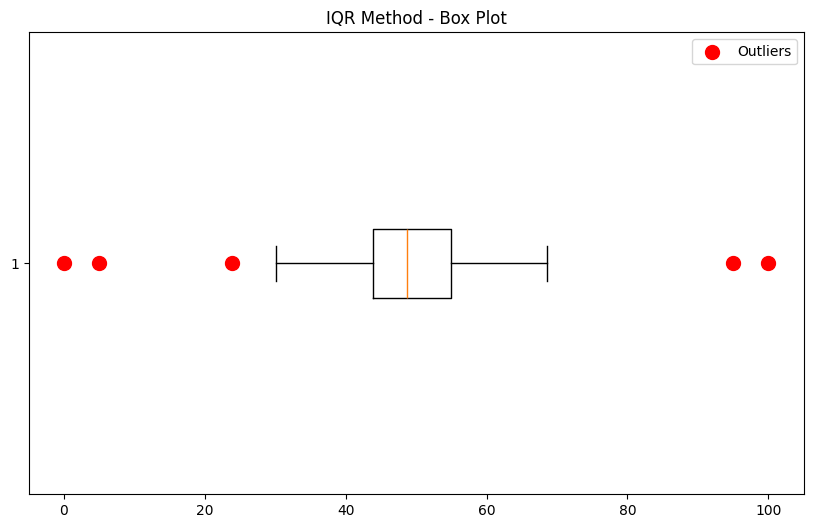

In [82]:
# 데이터 생성
np.random.seed(42)
data = np.random.normal(50, 10, 100)
data = np.append(data, [0, 5, 95, 100])  # 이상치 추가

# IQR 계산
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1

# 이상치 경계
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# 이상치 탐지
outliers_mask = (data < lower_bound) | (data > upper_bound)
outliers = data[outliers_mask]

print(f"Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
print(f"Lower bound: {lower_bound:.2f}")
print(f"Upper bound: {upper_bound:.2f}")
print(f"이상치: {outliers}")

# Box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, vert=False)
plt.scatter(outliers, [1]*len(outliers), c='red', s=100, 
            zorder=3, label='Outliers')
plt.title('IQR Method - Box Plot')
plt.legend()
plt.show()

# DBSCAN (Density-Based) 실습

정상 데이터: 248개
이상치: 55개
군집 개수: 5개


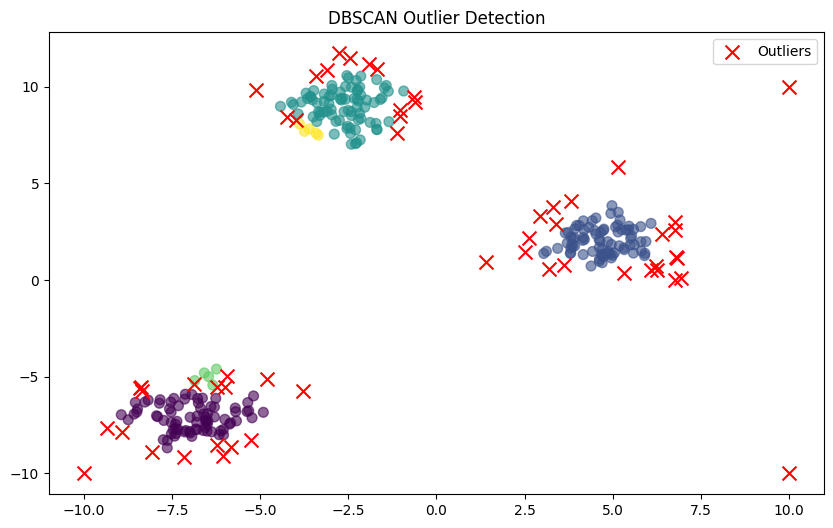

In [83]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# 데이터 생성 (정상 + 이상치)
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)
X = np.vstack([X, [[10, 10], [-10, -10], [10, -10]]])  # 이상치 추가

# DBSCAN 적용
dbscan = DBSCAN(eps=0.5, min_samples=5)
labels = dbscan.fit_predict(X)

# 이상치 추출
outliers = X[labels == -1]
inliers = X[labels != -1]

print(f"정상 데이터: {len(inliers)}개")
print(f"이상치: {len(outliers)}개")
print(f"군집 개수: {len(set(labels)) - (1 if -1 in labels else 0)}개")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c=labels[labels != -1], 
            cmap='viridis', alpha=0.6, s=50)
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', 
            s=100, marker='x', label='Outliers')
plt.title('DBSCAN Outlier Detection')
plt.legend()
plt.show()

# LOF 실습

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.
정상 데이터: 145개
이상치: 8개
이상치 LOF scores: [-1.93321727 -1.69263105 -2.32018317 -1.5555237  -4.29849615 -1.54581308
 -6.93339949 -3.13299896]


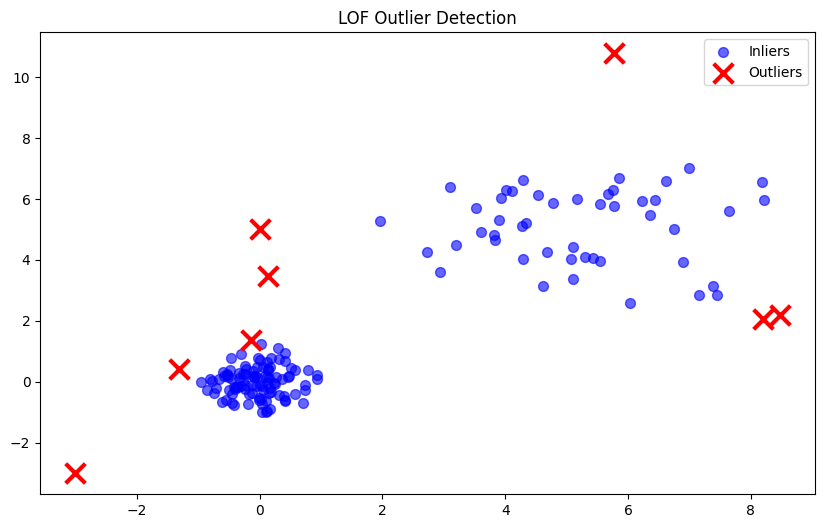

In [84]:
from sklearn.neighbors import LocalOutlierFactor
import numpy as np
import matplotlib.pyplot as plt

# 데이터 생성 (다양한 밀도의 군집)
np.random.seed(42)
X1 = np.random.normal(0, 0.5, (100, 2))  # 조밀한 군집
X2 = np.random.normal(5, 1.5, (50, 2))   # 느슨한 군집
X_outliers = np.array([[7, 7], [-3, -3], [0, 5]])  # 이상치
X = np.vstack([X1, X2, X_outliers])

# LOF 적용
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.05)
labels = lof.fit_predict(X)
scores = lof.negative_outlier_factor_

# 이상치 추출
outliers = X[labels == -1]
inliers = X[labels == 1]

print(f"정상 데이터: {len(inliers)}개")
print(f"이상치: {len(outliers)}개")
print(f"이상치 LOF scores: {scores[labels == -1]}")

# 시각화
plt.figure(figsize=(10, 6))
plt.scatter(inliers[:, 0], inliers[:, 1], c='blue', 
            alpha=0.6, s=50, label='Inliers')
plt.scatter(outliers[:, 0], outliers[:, 1], c='red', 
            s=200, marker='x', label='Outliers', linewidths=3)
plt.title('LOF Outlier Detection')
plt.legend()
plt.show()